<a href="https://colab.research.google.com/github/yayasoureya/Simulaton/blob/main/gabriel_Monkon_IDS_Intelligent_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

<h1 style="text-transform: uppercase;">
 thème: Mise en place D'un système de détection d'intruision intelligent en utilisant l'apprentissage profond
</h1>

le dataset contient <span style="color: blue; font-weight: bold;">65532 observations</span> avec <span style="color: blue; font-weight: bold;">12 colonnes</span>.

Chaque entrée de l’ensemble de données représente un flux de trafic jugé suspect sur la base d’un ensemble de critères. L’ensemble de données contient des informations sur les enregistrements du trafic Web. Pour fournir un bref résumé des colonnes et des significations qui leur sont associées :
- Source Port: port d'origine de la requête
- Bytes: le nombre total de bits entrant et sortant
-  Bytes Received : nombre de bytes entrant.
-  Bytes Sent : Bytes sortant .
-  Elapsed Time (sec) : LE Nombre de temps écoulé depuis l'arrivée de la requête jusqu'a sa sortie.
-  NAT Source Port : port par lequel arrive la requete sur le reseau .
-  NAT Destination Port: le port de destination de la requête
-  Packets : le nombre total de paquets entrants et sortants .
- pkts_sent: le nombre de paquets envoyé comme réponse à la requête  
- pkts_received:  le nombre de paquet reçu de la requête
-  Action : Décision prise lors de l'accès au serveur soit accepté soit refusé .

# importation des librairies

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
import missingno as mno
from   scipy.stats import chi2_contingency, ttest_ind, shapiro
from   scipy.stats import mannwhitneyu, kruskal, wilcoxon
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Importation du jeu de donnée et début de l'analyse

In [1]:
data  =  pd.read_csv("log2.csv")
data.head()

NameError: name 'pd' is not defined

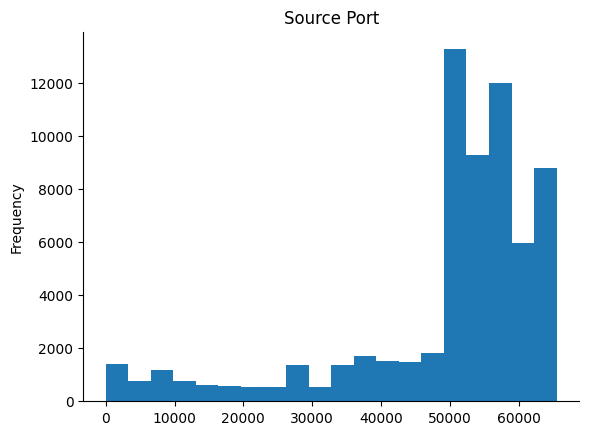

In [ ]:
# @title Source Port

from matplotlib import pyplot as plt
data['Source Port'].plot(kind='hist', bins=20, title='Source Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.tail()

NameError: name 'data' is not defined

In [ ]:
data["Action"].replace(['allow', 'drop', 'deny', 'reset-both'],["1","0","0","0"], inplace=True)
data["Action"]= data.Action.astype(int)

In [ ]:
data.isna().sum()

,0
Source Port,0
Destination Port,0
NAT Source Port,0
NAT Destination Port,0
Action,0
Bytes,0
Bytes Sent,0
Bytes Received,0
Packets,0
Elapsed Time (sec),0


In [ ]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18


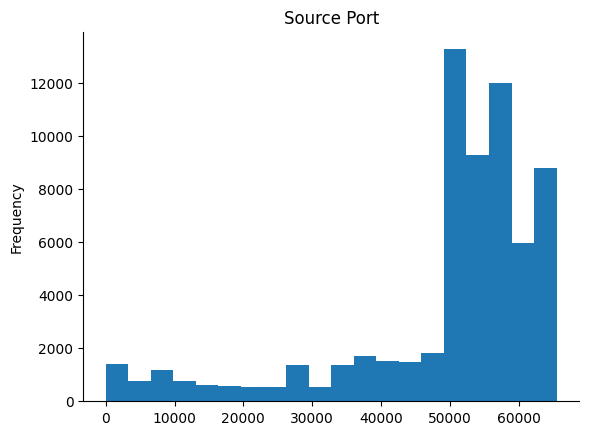

In [ ]:
# @title Source Port

from matplotlib import pyplot as plt
data['Source Port'].plot(kind='hist', bins=20, title='Source Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data[data.duplicated()].shape

(0, 6)

In [ ]:
data.columns

Index(['Action', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)',
       'pkts_sent', 'pkts_received'],
      dtype='object')

<h1 style="text-transform: uppercase; color: blue; text-align: center">Analyse De Données</h1>
le dataset contient <span style="color: blue; font-weight: bold;">65532 observations</span> avec <span style="color: blue; font-weight: bold;">12 colonnes</span>. il n'ya pas de  <span style="color: red; font-weight: bold;">valeurs nulle</span> dans les colonnes, ce qui est bien  <span style="color: blue; font-weight: bold;">pour l'intégrité de nos données</span>. Toutes fois procédons au cleaning des données:


1. <span style="color: blue; font-weight: bold;"> Supprimer les lignes dupliquées :</span>Même si toutes les entrées sont  non-nulle, il y a plusieurs valeurs dupliquées qu'il convient de rétirer pour l'intégrité de nos données.
2. <span style="color: blue; font-weight: bold;"> Corrections des types de données :</span> La colonne: `Action` doit être au format  int  pour une meilleure analyse .
3. <span style="color: blue; font-weight: bold;"> Standardizer les données  :</span> S'asssurer que les données sont bien formattée est  important, particulièrement si on veux l'integrer à notre model .

Processus de cleaning de données:

1. <span style="color: blue; font-weight: bold;"> Lignes dupliquées :</span> sur 65532  lignes on y retrouve 8370 lignes dupliquées.
3. <span style="color: blue; font-weight: bold;"> Label Encoding :</span> la colonne  `Action`  contient deux valeurs uniques (Allow et Deny soit 1 et 0 ces deux valeurs respectivement  
4. <span style="color: blue; font-weight: bold;"> Suppression des colonnes pas utiles :</span> certaines colonnes   `Action`  Ne nous seront pas utile lors de l'analyse

In [ ]:

data.drop(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port','Bytes',
      'Packets'], axis=1, inplace=True)

data.drop_duplicates(inplace=True)


NameError: name 'data' is not defined

In [ ]:
data.head()

,Action,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received
0,1,94,83,30,1,1
1,1,1600,3168,17,10,9
2,1,118,120,1199,1,1
3,1,1438,1889,17,8,7
4,1,6778,18580,16,13,18


In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Bytes Sent', y='Bytes Received', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_4' is not defined

In [ ]:
print("la variable à expliquer ici est Action")
tmpstr="le jeu de donnée contient {} lignes et {} colonnes"
print(tmpstr.format(data.shape[0],data.shape[1]))

la variable à expliquer ici est Action
le jeu de donnée contient 18059 lignes et 6 colonnes


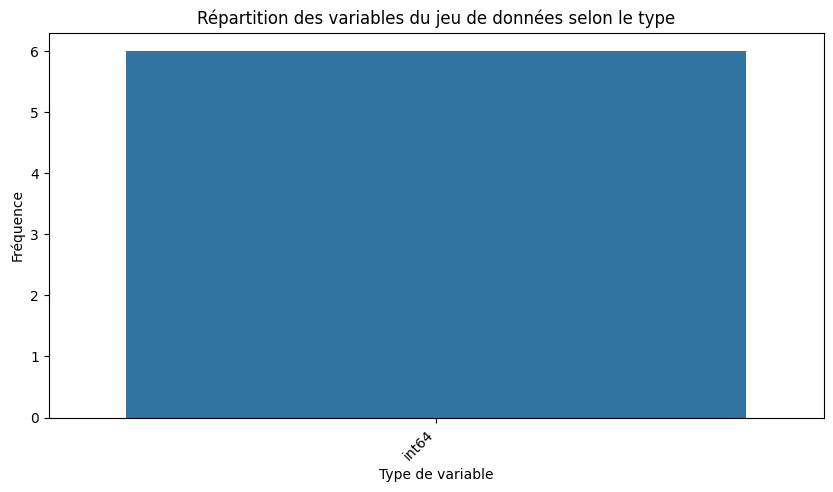

In [ ]:
freq = data.dtypes.value_counts()
freq = freq.sort_values(axis = 0, ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(x = freq.index, y = freq.values)
plt.xticks(rotation = 45, ha = "right")
plt.title("Répartition des variables du jeu de données selon le type")
plt.ylabel("Fréquence")
plt.xlabel("Type de variable")
plt.show()

    Colonnes du jeu de donnée
<ul>
    <li>Source Port</li>
        <li>Destination Port</li>
        <li>NAT Source Port</li>
        <li>NAT Destination Port</li>
        <li>Action</li>
        <li>Bytes</li>
        <li>Bytes Sent</li>
        <li>Bytes Received</li>
        <li>Packets</li>
        <li>Elapsed Time (sec)</li>
        <li>pkts_sent</li>
        <li>pkts_received</li>

</ul>
      
<p>
    le dataset contient <mark>11 colonnes (explicative) quantitative</mark>
    et <mark> 1 colonne (explicative) qualitative</mark>
</p>


In [ ]:
data.columns

Index(['Action', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)',
       'pkts_sent', 'pkts_received'],
      dtype='object')

<p>
Notre Jeu De donnée ne comporte pas de donnée manquante
<p>

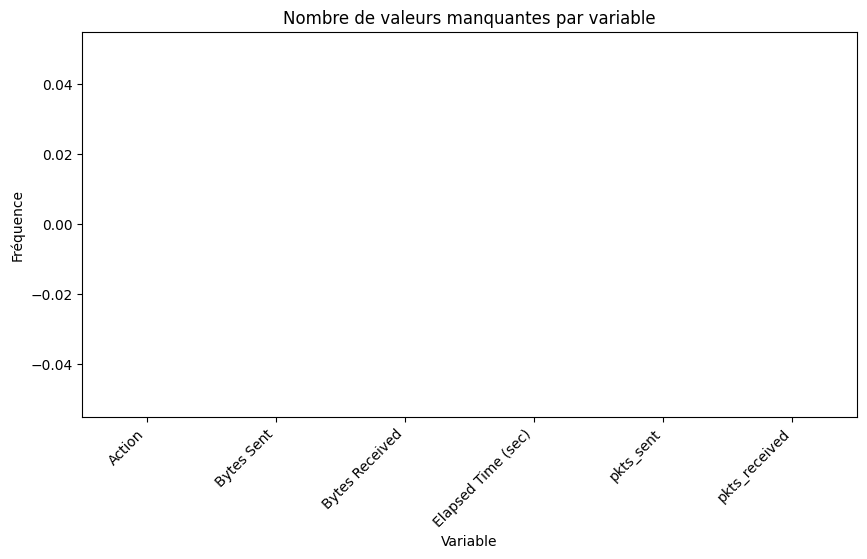

In [ ]:
missing_stats = data.isna().sum(axis = 0)
missing_stats = missing_stats.sort_values(axis = 0, ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = missing_stats.index, y = missing_stats.values)
plt.xticks(rotation = 45, ha = "right")
plt.title("Nombre de valeurs manquantes par variable")
plt.ylabel("Fréquence")
plt.xlabel("Variable")
plt.show()

In [ ]:
mno.matrix(data)
plt.show()

NameError: name 'data' is not defined

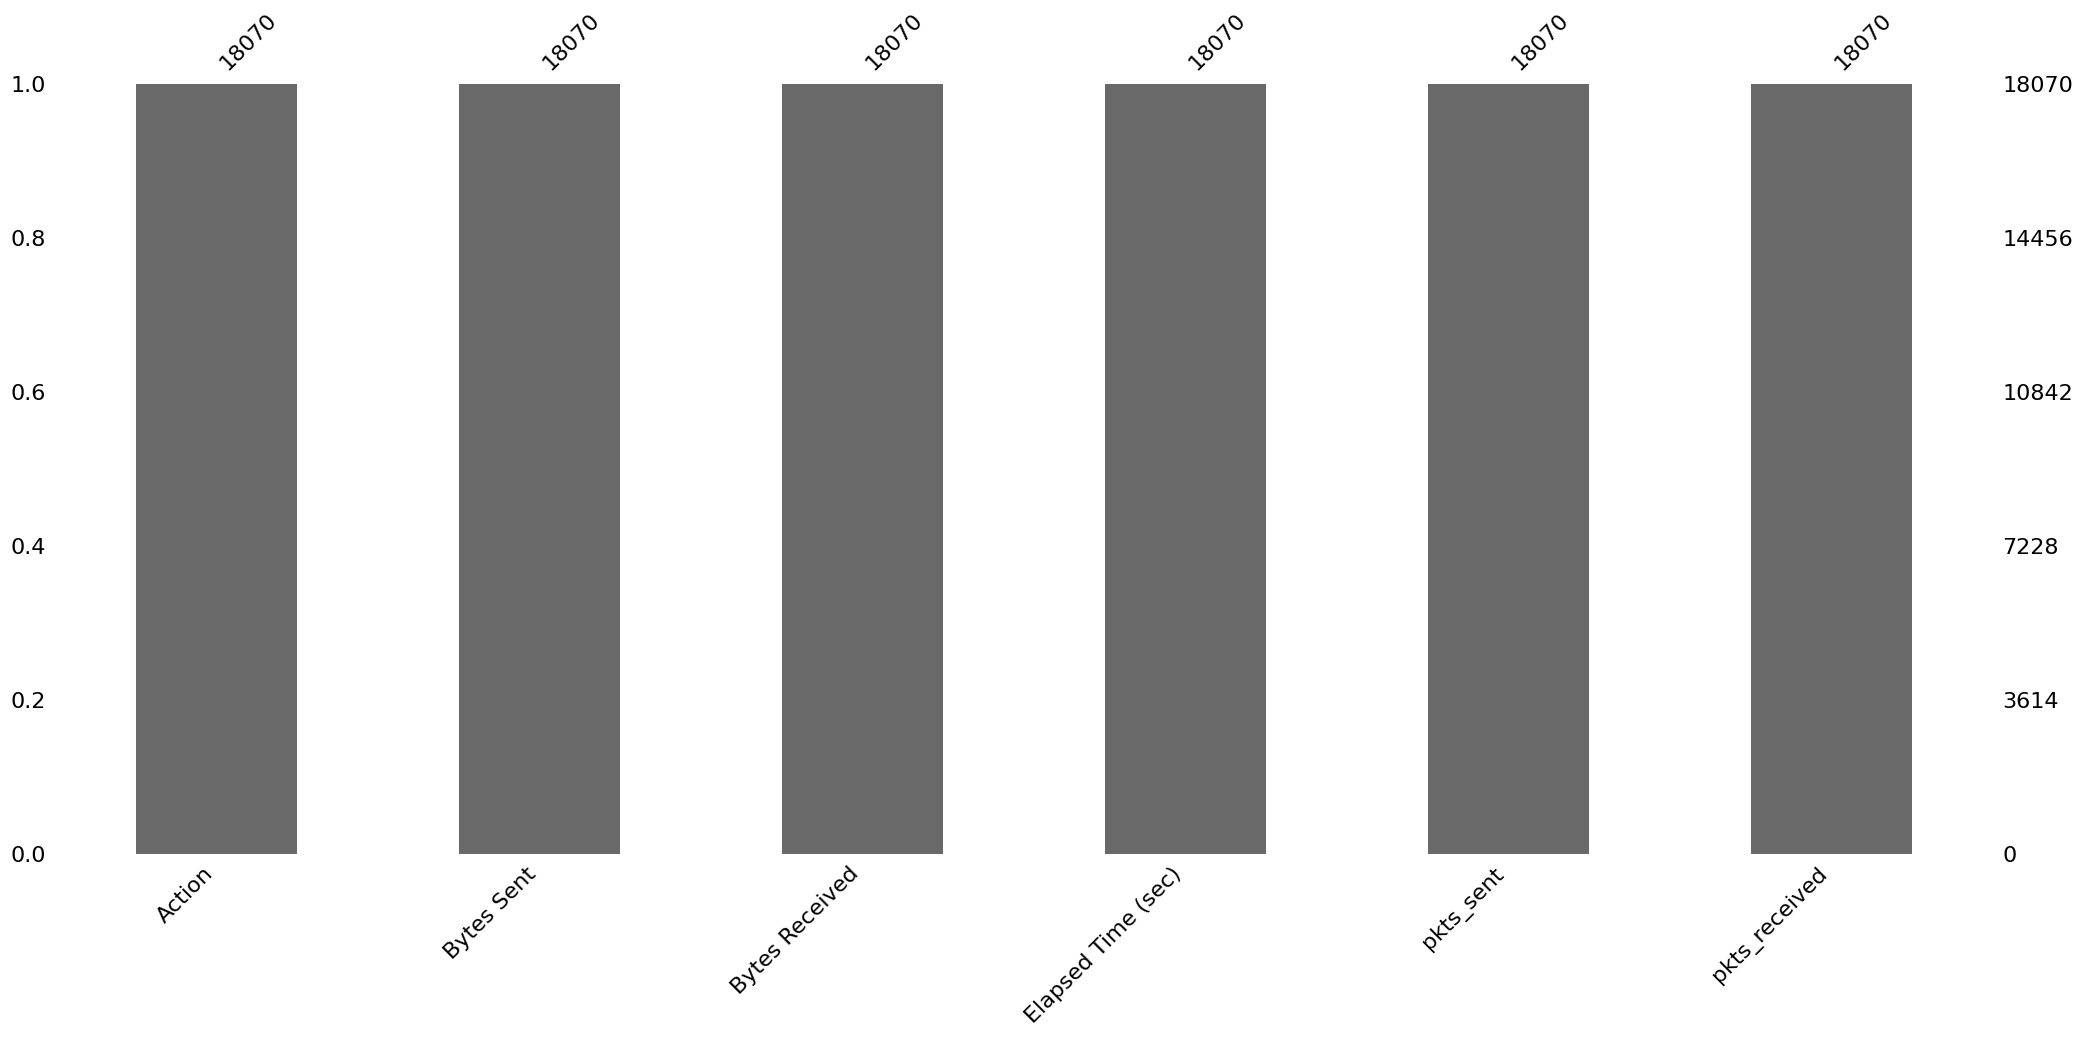

In [ ]:
mno.bar(data)
plt.show()

Le jeu de données est composé de: 98.85% Intruisions admise
Le jeu de données est composé de: 1.15% intruisions Refusée


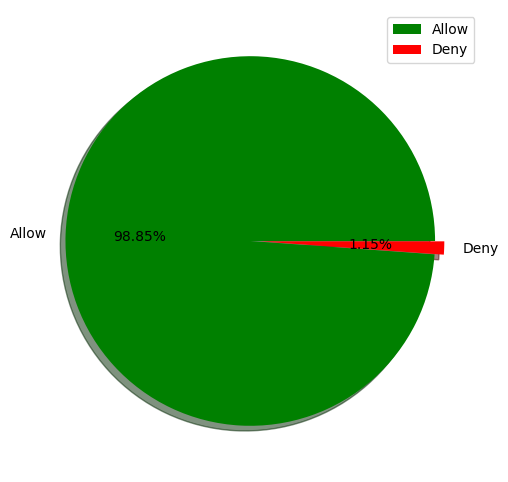

In [ ]:
freq = np.round(data["Action"].value_counts(normalize = True) * 100, 2)
print(f"Le jeu de données est composé de: {freq[1]}% Intruisions admise")
print(f"Le jeu de données est composé de: {freq[0]}% intruisions Refusée")

plt.figure(figsize = (6, 6))
plt.pie(freq,
        labels = ["Allow", "Deny"],
        colors = ["green", "red"],
        explode = [0, 0.05],
        autopct = lambda x: str(np.round(x, 2)) + "%",
        shadow = True
       )
plt.legend()
plt.show()

In [ ]:
data.columns

Index(['Action', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)',
       'pkts_sent', 'pkts_received'],
      dtype='object')

les valeurs [intervalles ] valeur en %

In [ ]:
data.describe()

NameError: name 'data' is not defined

In [ ]:
data['Bytes Received'].min()

NameError: name 'data' is not defined

In [ ]:
(data[data['Bytes Received']<3000].shape[0]/ data.shape[0])*100

NameError: name 'data' is not defined

In [ ]:
np.max(data['Bytes Received'])

NameError: name 'np' is not defined

In [ ]:
np.min(data['Elapsed Time (sec)'])

NameError: name 'np' is not defined

<Figure size 640x480 with 0 Axes>

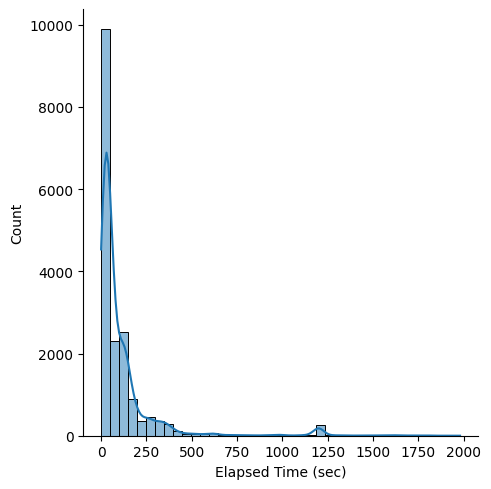

In [ ]:
#displot de 'Elapsed Time (sec)'
plt.figure()
sns.displot(data['Elapsed Time (sec)'][data['Elapsed Time (sec)']<2000], bins = 40, kde = True)
plt.show();

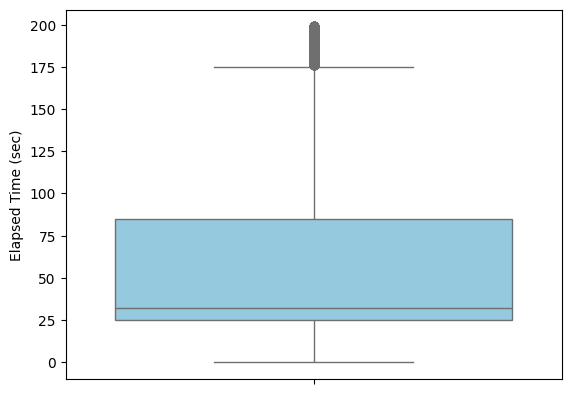

In [ ]:
plt.figure()
sns.boxplot(data= data[data['Elapsed Time (sec)']<200], y="Elapsed Time (sec)",color = "skyblue")
plt.show()

In [ ]:
data['Bytes Sent'].min(),np.max(data['Bytes Sent'])

NameError: name 'data' is not defined

In [ ]:
data['Bytes Sent'][data['Bytes Sent']<=6000].shape[0]/data.shape[0]

0.8518539014941893

<Figure size 640x480 with 0 Axes>

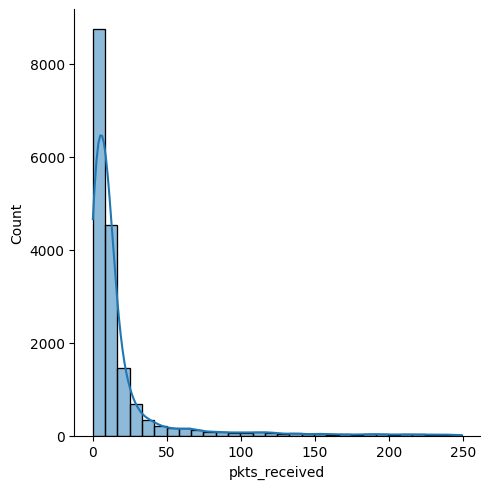

In [ ]:
#displot de packet Received
plt.figure()
sns.displot(data['pkts_received'][data['pkts_received']<250], bins = 30, kde = True)
plt.show()

<Figure size 640x480 with 0 Axes>

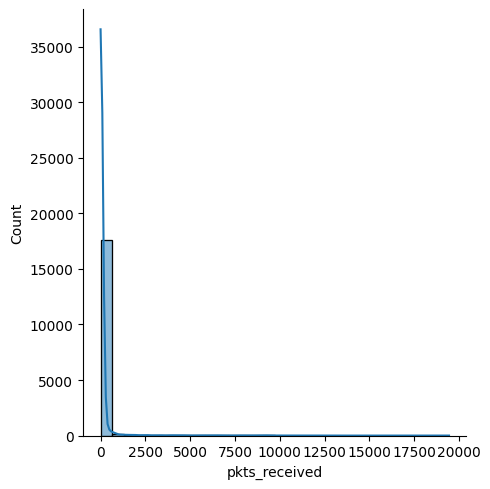

In [ ]:
#displot de packet Received
plt.figure()
sns.displot(data['pkts_received'][data['pkts_received']<20000], bins = 30, kde = True)
plt.show()

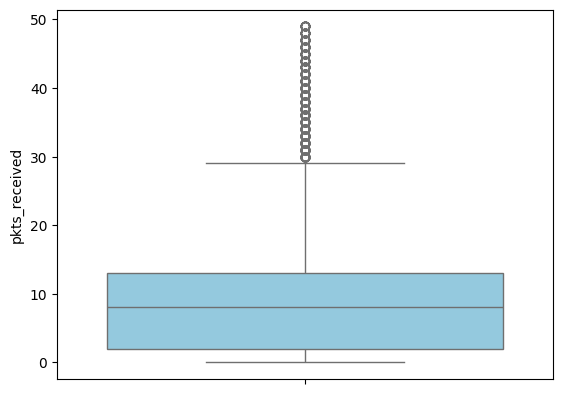

In [ ]:
plt.figure()
sns.boxplot(data=data[data['pkts_received']<50],y="pkts_received" ,color = "skyblue")
plt.show()

<Figure size 640x480 with 0 Axes>

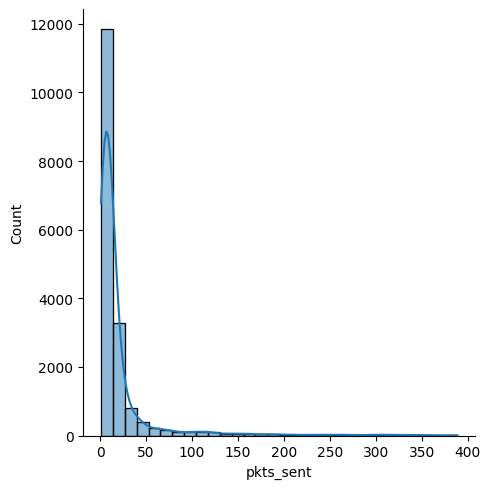

In [ ]:
#displot de packet Sent
plt.figure()
sns.displot(data['pkts_sent'][data["pkts_sent"]<400], bins = 30, kde = True)
plt.show()

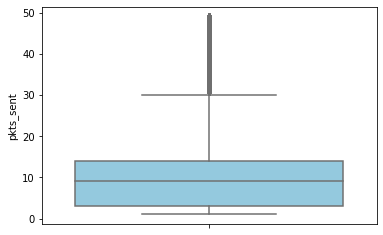

In [ ]:
plt.figure()
sns.boxplot(data=data[data['pkts_sent']<50],y="pkts_sent", color = "skyblue")
plt.show()

<Figure size 432x288 with 0 Axes>

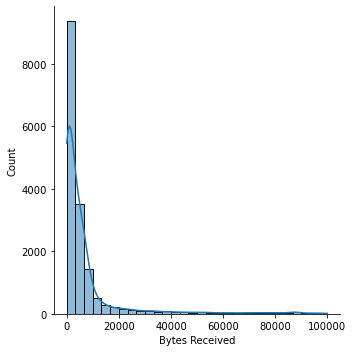

In [ ]:
#displot de Bytes Received

# la distribution n'est pas Symétrique
# la variable ne suit pas une distriburtion Gaussienne
plt.figure()
sns.displot(data["Bytes Received"][data["Bytes Received"]<100000], bins = 30, kde = True)
plt.show()

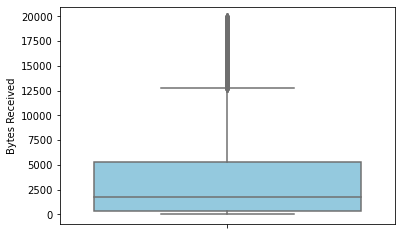

In [ ]:
# la médiane n'est pas au centre mais rapprochée vers la Gauche ce qui traduit sa non symétrie
plt.figure()
sns.boxplot(data= data[data['Bytes Received']<20000],y="Bytes Received" ,color = "skyblue")
plt.show()

<Figure size 432x288 with 0 Axes>

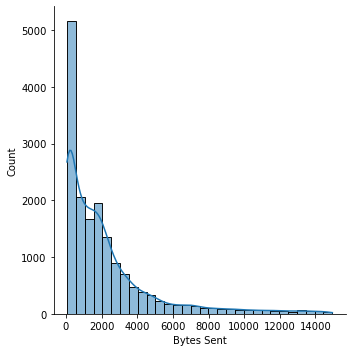

In [ ]:
#displot de Bytes Sent
plt.figure()
sns.displot(data["Bytes Sent"][data["Bytes Sent"]<15000], bins = 30, kde = True)

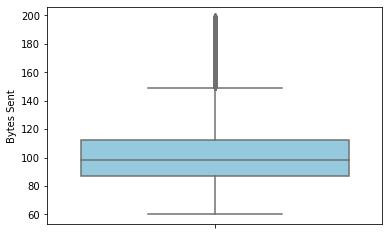

In [ ]:
plt.figure()
sns.boxplot(data = data[data['Bytes Sent']<200],y='Bytes Sent', color = "skyblue")
plt.show()

<Figure size 432x288 with 0 Axes>

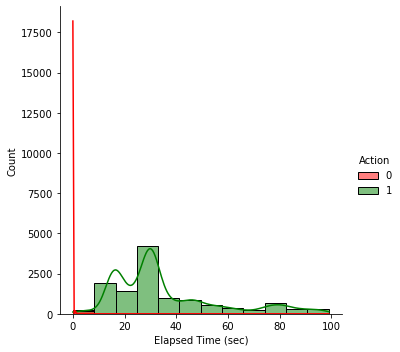

In [ ]:
plt.figure()
sns.displot(data = data[data['Elapsed Time (sec)']<100],
            x = 'Elapsed Time (sec)',
            hue = "Action",
            bins = 12,
            kde = True,
            palette = ["red", "green"]
           )
plt.show()

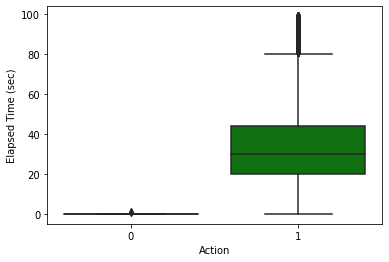

In [ ]:
plt.figure()
sns.boxplot(data = data[data['Elapsed Time (sec)']<100],
            y = 'Elapsed Time (sec)',
                x = "Action",
                palette = ["red", "green"]
               )
plt.show()

<Figure size 432x288 with 0 Axes>

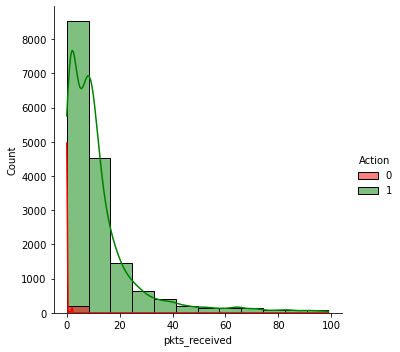

In [ ]:
plt.figure()
sns.displot(data = data[data['pkts_received']<100],
            x = 'pkts_received',
            hue = "Action",
            bins = 12,
            kde = True,
            palette = ["red", "green"]
           )
plt.show()

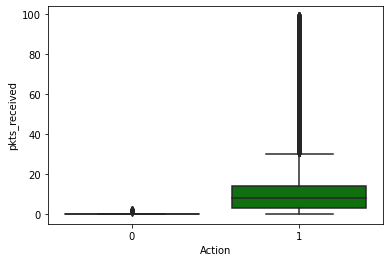

In [ ]:
plt.figure()
sns.boxplot(data = data[data['pkts_received']<100],
            y = 'pkts_received',
                x = "Action",
                palette = ["red", "green"]
               )
plt.show()

<Figure size 432x288 with 0 Axes>

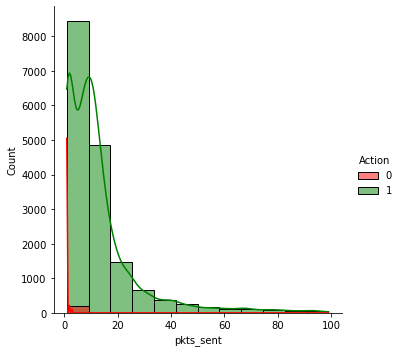

In [ ]:
plt.figure()
sns.displot(data = data[data['pkts_sent']<100],
            x = 'pkts_sent',
            hue = "Action",
            bins = 12,
            kde = True,
            palette = ["red", "green"]
           )
plt.show()

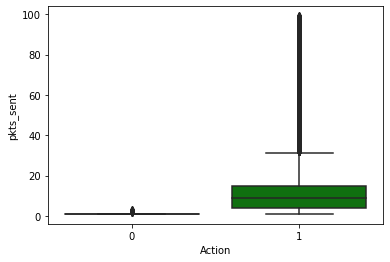

In [ ]:
plt.figure()
sns.boxplot(data = data[data['pkts_sent']<100],
            y = 'pkts_sent',
                x = "Action",
                palette = ["red", "green"]
               )
plt.show()

<Figure size 432x288 with 0 Axes>

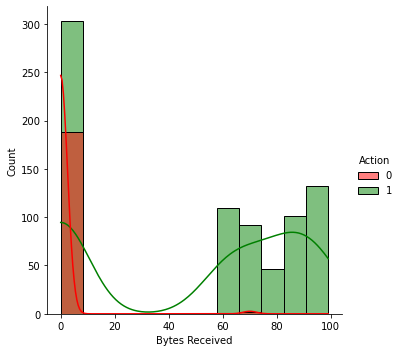

In [ ]:
plt.figure()
sns.displot(data = data[data['Bytes Received']<100],
            x = 'Bytes Received',
            hue = "Action",
            bins = 12,
            kde = True,
            palette = ["red", "green"]
           )
plt.show()

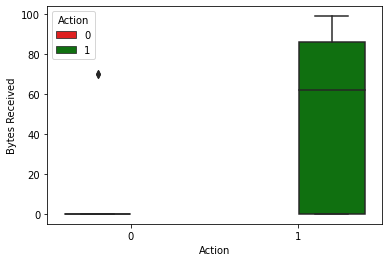

In [ ]:
plt.figure()
sns.boxplot(data = data[data['Bytes Received']<100],
            y = 'Bytes Received',
            hue = "Action",
                x = "Action",
                palette = ["red", "green"]
               )
plt.show()

<Figure size 432x288 with 0 Axes>

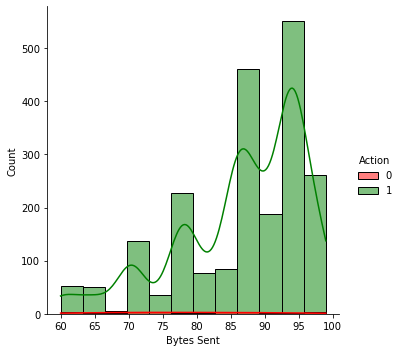

In [ ]:
plt.figure()
sns.displot(data = data[data['Bytes Sent']<100],
            x = 'Bytes Sent',
            hue = "Action",
            bins = 12,
            kde = True,
            palette = ["red", "green"]
           )
plt.show()

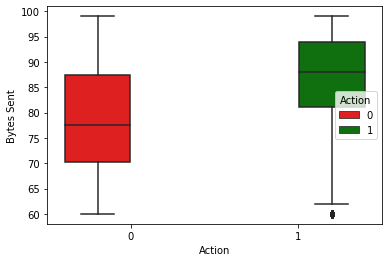

In [ ]:
plt.figure()
sns.boxplot(data = data[data['Bytes Sent']<100],
            y = 'Bytes Sent',
            hue = "Action",
                x = "Action",
                palette = ["red", "green"]
               )
plt.show()

In [ ]:
positive = data[data["Action"] == 1]
negative = data[data["Action"] == 0]
print(negative.shape)
print(positive.shape)

(207, 6)
(17863, 6)


In [ ]:
data.columns

Index(['Action', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)',
       'pkts_sent', 'pkts_received'],
      dtype='object')

<mark>Test d'hypothèses</mark>

In [ ]:
np.random.seed(2)
shapiro(negative["Bytes Sent"].sample(50))
shapiro(positive["Bytes Sent"].sample(50))

NameError: name 'np' is not defined

In [ ]:
np.random.seed(2)
shapiro(negative['Bytes Received'].sample(50))
shapiro(positive['Bytes Received'].sample(50))

ShapiroResult(statistic=0.3327503845777805, pvalue=9.952418412826146e-14)

In [ ]:
np.random.seed(2)
shapiro(negative['Elapsed Time (sec)'].sample(50))
shapiro(positive['Elapsed Time (sec)'].sample(50))

NameError: name 'np' is not defined

In [ ]:
np.random.seed(2)
shapiro(negative['pkts_sent'].sample(50))
shapiro(positive['pkts_sent'].sample(50))

NameError: name 'np' is not defined

In [ ]:
np.random.seed(2)
shapiro(negative['pkts_received'].sample(50))
shapiro(positive['pkts_received'].sample(50))

ShapiroResult(statistic=0.3661885060719122, pvalue=2.2469080207563807e-13)

In [ ]:
# NON PARAMETRIQUE QUI COMPARE LES MEDIANES DE CHAQUE SOUS POPULATION
def mannwhiteney_test(data, var, target = "Action", alpha = 0.05):
    positive = data[(data[target] == 1)]
    negative = data[(data[target] == 0)]
    if (positive.shape[0] > negative.shape[0]):
        positive = positive.sample(negative.shape[0])
    else:
        negative = negative.sample(positive.shape[0])

    stat, p_value = mannwhitneyu(negative[var].dropna(), positive[var].dropna())
    if (p_value < alpha):
        message = "L'hypothèse H0 est rejetée !"
    else:
        message = "L'on ne peut conclure au rejet de l'hypothèse H0 !"

    return(message)

In [ ]:
for variable in data.select_dtypes("int64"):
    test = mannwhiteney_test(data, variable)
    print(f"{variable :-<50} {test}")

Action-------------------------------------------- L'hypothèse H0 est rejetée !
Bytes Sent---------------------------------------- L'hypothèse H0 est rejetée !
Bytes Received------------------------------------ L'hypothèse H0 est rejetée !
Elapsed Time (sec)-------------------------------- L'hypothèse H0 est rejetée !
pkts_sent----------------------------------------- L'hypothèse H0 est rejetée !
pkts_received------------------------------------- L'hypothèse H0 est rejetée !


Une étape importante dans le processus de résumé, de description et de compréhension des modèles sous-jacents dans les données est la réalisation de l’analyse statistique. L’examen de plusieurs aspects tels que les distributions, les tendances centrales, la variabilité et les corrélations entre les caractéristiques est inclus dans ce document. Sur votre jeu de données converti, nous allons effectuer un certain nombre d’analyses statistiques, notamment les suivantes :


1. <span style="color: blue; font-weight: bold;">  Statistique Descriptive :</span> ceci inclut la  moyenne, médiané, mode, min, max, intervalle, quartiles, et la  deviations.
2. <span style="color: blue; font-weight: bold;">  Analyse des Correlations :</span> Étudier les relations entre les caractéristiques numériques et la façon dont elles sont liées les unes aux autres.
3. <span style="color: blue; font-weight: bold;">Analyse Distributive  :</span> Examiner la distribution des principales caractéristiques à l’aide d’histogrammes et de boîtes à moustaches pour déterminer la propagation et la présence de valeurs aberrantes..


### <span style="color: red; font-weight: bold;"> Statistique Descriptive  </span>

Les statistiques descriptives fournissent un résumé des principales caractéristiques statistiques des caractéristiques numériques.
### Corrélations élevées (proches de 1 ou -1) indiquent une relation forte, positive ou négative, entre les variables.
### Corrélations faibles (proches de 0) indiquent une relation faible ou inexistante.
-  `Bytes Received` et `Bytes Sent(0.58)` ont une corrélation modérée. Cela suggère que  plus le nombre d'octets reçus augmente, plus le nombre d'octets envoyés tend également à augmenter, mais la relation n'est pas très forte.
- `Bytes Received` et   `Elapsed Time(0.16) ` : la corrélation  est  peu constante, ce qui suggère que chaque session ou observation est enregistrée sur un intervalle fixe.
- `Bytes Received ` et `pkts_sent(0.69) `: il existe une corrélation modérée à forte entre les `Bytes Received` et les `pkts_send`. Cela indique que les `Bytes Received` sont assez bien liés au nombre de `pkts_sent`.
- `Bytes Received` et. `pkts_received (0.95)`:La corrélation est très forte entre les octets reçus et les paquets reçus. Cela suggère que les octets reçus sont fortement liés au nombre de paquets reçus.
- `Bytes Sent` Et `Elapsed Time (0.12)`: la corrélation est très faible ce qui suggère que le nombre de bits envoyé n'est pas lié au temps écoulé(Elapsed Time)
- `Bytes Sent` Et. `pkts_sent (0.97)`: Cela indique que le nombre d'octets envoyés est fortement lié au nombre de paquets envoyés.
- `Bytes Sent` ET `pkts_received (0.64)`: La corrélation modérée entre les octets envoyés et les paquets reçus. Ceci indique une certaine relation entre ces deux variables, mais elle n'est pas très forte
- `Elapsed Time (sec)` ET `pkts_sent (0.15)`: La corrélation est faible entre le temps écoulé et les paquets envoyés, indiquant une relation faible entre ces deux variables
- `Elapsed Time (sec)` ET. `pkts_received (0.16)`:La corrélation est très faible entre le temps écoulé et les paquets reçus. Le temps écoulé n'est que faiblement lié au nombre de paquets reçus
- `pkts_sent` ET `pkts_received (0.77)`: Il existe une corrélation modérée à forte entre les paquets envoyés et les paquets reçus. Cela suggère que le nombre de paquets envoyés est assez bien lié au nombre de paquets reçus.

In [ ]:

numeric_df = data[['Bytes Received', 'Bytes Sent', 'Elapsed Time (sec)','pkts_sent','pkts_received']].select_dtypes(include=['int32', 'int64'])
correlation_matrix_numeric = numeric_df.corr()
# matrice de corrélation
correlation_matrix_numeric

,Bytes Received,Bytes Sent,Elapsed Time (sec),pkts_sent,pkts_received
Bytes Received,1.000000,0.575304,0.158553,0.690943,0.945932
Bytes Sent,0.575304,1.000000,0.146602,0.974027,0.639338
Elapsed Time (sec),0.158553,0.146602,1.000000,0.154864,0.159978
pkts_sent,0.690943,0.974027,0.154864,1.000000,0.771572
pkts_received,0.945932,0.639338,0.159978,0.771572,1.000000


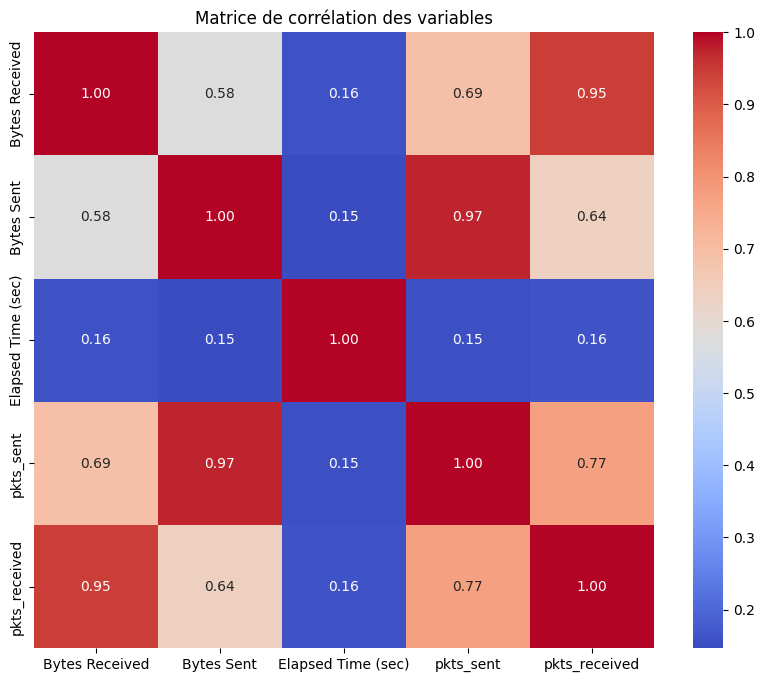

In [ ]:
# matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des variables')
plt.show()

In [ ]:
data.drop("Action", axis=1).columns

Index(['Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

Recupération de valeurs Numériques

In [ ]:


# Définition des colonnes numériques
numerical_features =data.drop("Action", axis=1).columns
numerical_features

Index(['Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

# Creation d'un pipeline

In [ ]:

# mise en place d'un pipeline de données
numerical_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

# Application de transformations aux données numériques
prepro = ColumnTransformer(
    transformers=[('num', numerical_pipeline, numerical_features)],
    remainder='passthrough'
)


In [ ]:
data.columns

Index(['Action', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)',
       'pkts_sent', 'pkts_received'],
      dtype='object')

In [ ]:
data.drop('Action', axis=1)

,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received
0,94,83,30,1,1
1,1600,3168,17,10,9
2,118,120,1199,1,1
3,1438,1889,17,8,7
4,6778,18580,16,13,18
...,...,...,...,...,...
65498,3215,4697,20,12,11
65499,10123,12110,28,16,21
65505,1880,3896,272,11,8
65511,788,2659,135,6,7


In [ ]:
data.isna().sum()

,0
Action,0
Bytes Sent,0
Bytes Received,0
Elapsed Time (sec),0
pkts_sent,0
pkts_received,0


# spliting des données

   - Split des données en deux variable X(features) et Y(Target variable)
   - creation des jeux de test et d'entrainement de notre model

In [ ]:

# Split data into features and target
X = data.drop('Action', axis=1)
y = data['Action']

# création des jeux d'entrainement et de test du model
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_0.shape

(14447, 5)

In [ ]:
res=np.isnan(y_train_0)
for i in res:
    if i!=True:
        print("found one element Null")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
found one element Null
fo

# Fit de nos données au pipeline

In [ ]:


# Fit et tranformation des donnée d'entrainement
X_train_transformed = prepro.fit_transform(X_train_0)
X_test_transformed = prepro.transform(X_test_0)

y_train_encoded =y_train_0
y_test_encoded =  y_test_0

# Application de L'algorithme SMOTE
cet algroithme sera utilisé pour gérer le déséquilibre entre les modalités de la variable Action

In [ ]:


# Application du smote pour l'équilibrage des classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train_encoded)

NameError: name 'X_train_transformed' is not defined

# Vérification de l'intégrité des données après le pipeline

In [ ]:
len(X_train_resampled), len(y_train_resampled)

(28570, 28570)

In [ ]:
#vérification des valeurs NAN
res= np.isnan(X_train_resampled)
for elt in res:
    for i in elt:
        if i !=False:
            print("found one")

In [ ]:


# Convertion du train en dataframe
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=numerical_features)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Action'])

# Concatenation des dataframe en un
train_df_resampled = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

In [ ]:
X_train_resampled_df.head()

,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received
0,-0.011047,-0.055186,-0.081508,-0.022287,-0.048793
1,-0.010722,-0.053708,-0.269061,-0.021113,-0.047501
2,-0.011044,-0.055584,-0.257090,-0.022141,-0.049223
3,-0.011175,-0.055647,-0.263075,-0.023168,-0.050084
4,-0.010528,-0.054640,-0.139370,-0.021260,-0.047932


In [ ]:
X_train_resampled_df.isna().sum()

,0
Bytes Sent,0
Bytes Received,0
Elapsed Time (sec),0
pkts_sent,0
pkts_received,0


In [ ]:
y_train_resampled

,Action
0,1
1,1
2,1
3,1
4,1
...,...
28565,0
28566,0
28567,0
28568,0


In [ ]:
res= np.isnan(y_train_resampled)
for i in res:
    if i!=False:
        print("found one!")

In [ ]:
train_df_resampled.head()

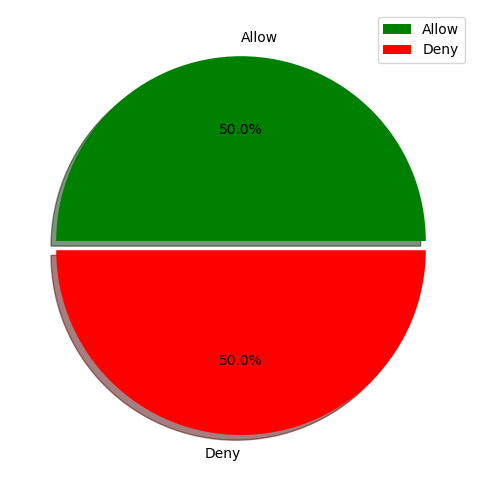

In [ ]:
freq = np.round(train_df_resampled["Action"].value_counts(normalize = True) * 100, 2)
plt.figure(figsize = (6, 6))
plt.pie(freq,
        labels = ["Allow", "Deny"],
        colors = ["green", "red"],
        explode = [0, 0.05],
        autopct = lambda x: str(np.round(x, 2)) + "%",
        shadow = True
       )
plt.legend()
plt.show()

In [ ]:
train_df_resampled.isna().sum()

,0
Bytes Sent,0
Bytes Received,0
Elapsed Time (sec),0
pkts_sent,0
pkts_received,0
Action,0


In [ ]:
#vérification des valeurs dupliquée
train_df_resampled[train_df_resampled.duplicated()==True]

,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received,Action
6667,-0.011177,-0.055666,-0.320938,-0.023168,-0.0503,0
6901,-0.011167,-0.055666,-0.320938,-0.023168,-0.0503,0
8732,-0.011167,-0.055666,-0.320938,-0.023168,-0.0503,0
10152,-0.011167,-0.055666,-0.320938,-0.023168,-0.0503,0
14185,-0.011168,-0.055666,-0.320938,-0.023168,-0.0503,0
...,...,...,...,...,...,...
28157,-0.011167,-0.055666,-0.320938,-0.023168,-0.0503,0
28300,-0.011168,-0.055666,-0.320938,-0.023168,-0.0503,0
28422,-0.011177,-0.055666,-0.320938,-0.023168,-0.0503,0
28442,-0.011177,-0.055666,-0.320938,-0.023168,-0.0503,0


# Preparation du Xtrain et Xtest final

In [ ]:
XtrainFinal= train_df_resampled.drop("Action", axis=1)
YtrainFinal= train_df_resampled["Action"]
#nous utiliserons le test du split


NameError: name 'train_df_resampled' is not defined

In [ ]:
TestDF=pd.DataFrame(X_test_transformed, columns=data.drop("Action", axis=1).columns)
TestDF.head()

,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received
0,-0.010896,-0.054268,-0.291009,-0.021260,-0.047932
1,-0.011082,-0.055572,-0.037612,-0.022434,-0.049439
2,-0.011098,-0.055546,-0.255094,-0.022434,-0.049439
3,-0.011174,-0.055617,-0.261080,-0.023168,-0.050084
4,-0.010504,-0.051365,-0.285023,-0.018764,-0.044057


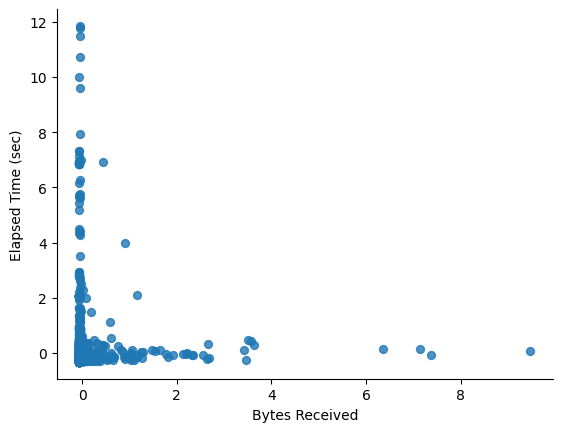

In [ ]:
# @title Bytes Received vs Elapsed Time (sec)

from matplotlib import pyplot as plt
TestDF.plot(kind='scatter', x='Bytes Received', y='Elapsed Time (sec)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
TestDF["Action"]=y_test_0
TestDF.head()

,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,-0.010896,-0.054268,-0.291009,-0.021260,-0.047932,1.0
1,-0.011082,-0.055572,-0.037612,-0.022434,-0.049439,NaN
2,-0.011098,-0.055546,-0.255094,-0.022434,-0.049439,NaN
3,-0.011174,-0.055617,-0.261080,-0.023168,-0.050084,1.0
4,-0.010504,-0.051365,-0.285023,-0.018764,-0.044057,NaN


In [ ]:
TestDF.dropna(axis=0, inplace=True)
XtestFinal= TestDF.drop("Action", axis=1)
YtestFinal= TestDF["Action"]

# Essai des modèles

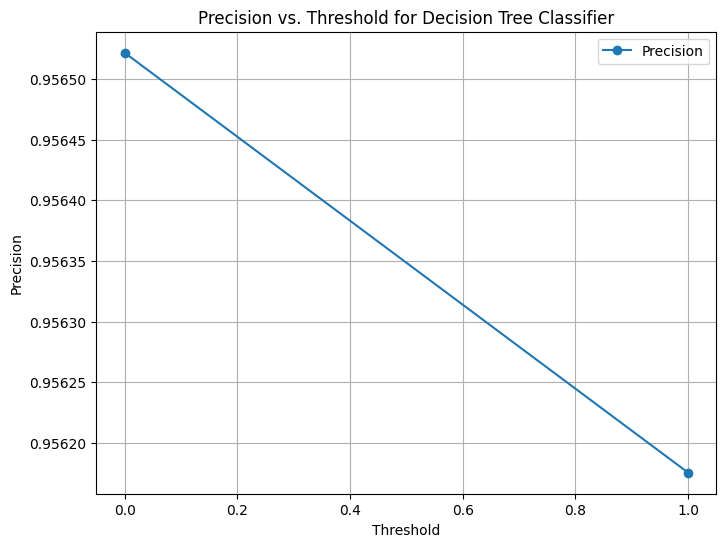

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

dc= DecisionTreeClassifier()
dc.fit(XtrainFinal,YtrainFinal)
dc.score(XtestFinal,YtestFinal)
y_scores = dc.predict(XtestFinal)
y_test = np.ravel(YtestFinal)

# Ensure y_scores is a 1D array
y_scores = np.ravel(y_scores)
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], marker='o', label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracy score


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dc = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(XtrainFinal, YtrainFinal)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from GridSearchCV
best_dc = grid_search.best_estimator_

# Predict on the test data
Ypred = best_dc.predict(XtestFinal)

# Calculate metrics
accuracy = accuracy_score(YtestFinal, Ypred)
precision = precision_score(YtestFinal, Ypred, average='weighted')  # Use 'weighted' to handle multiclass cases
recall = recall_score(YtestFinal, Ypred, average='weighted')
f1 = f1_score(YtestFinal, Ypred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.95
Precision: 0.91
Recall: 0.95
F1 Score: 0.93


In [ ]:
XtestFinal.shape

(253, 5)

In [ ]:
# y_pred_class=dc.predict(data.drop("Action", axis=1))
# cm = confusion_matrix(data["Action"], y_pred_class)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

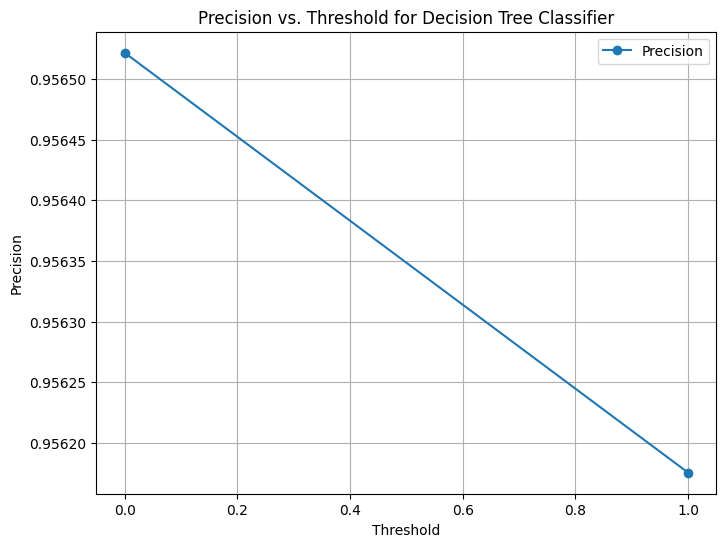

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(XtrainFinal,YtrainFinal)
rf.score(XtestFinal,YtestFinal)
y_test = np.ravel(YtestFinal)

# Ensure y_scores is a 1D array
y_scores = np.ravel(y_scores)
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], marker='o', label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracy score

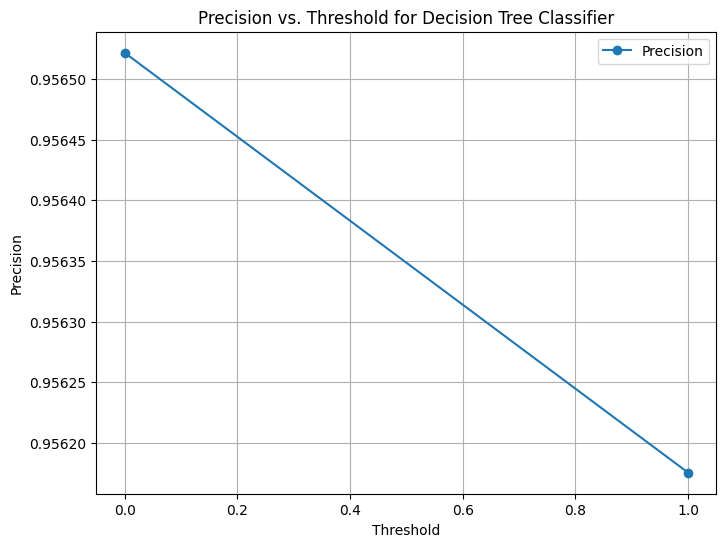

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(XtrainFinal,YtrainFinal)
knn.score(XtestFinal,YtestFinal)
y_test = np.ravel(YtestFinal)

# Ensure y_scores is a 1D array
y_scores = np.ravel(y_scores)
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], marker='o', label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracy score

In [ ]:
len(XtrainFinal.columns)

5

# Essai d'un jeu de Neurone

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC

# Model definition
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(XtrainFinal.shape[1], 1)),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Model training
history = model.fit(data.drop("Action", axis=1), data["Action"],
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Model evaluation
loss, accuracy, precision, recall, auc = model.evaluate(data.drop("Action", axis=1),  data["Action"])
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Precision: {precision*100:.2f}%")
print(f"Test Recall: {recall*100:.2f}%")
print(f"Test AUC: {auc*100:.2f}%")

# Predictions
y_pred = model.predict(data.drop("Action", axis=1))
y_pred_class = (y_pred > 0.5).astype(int).flatten()




Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9740 - auc: 0.6711 - loss: 2.7226 - precision: 0.9881 - recall: 0.9855 - val_accuracy: 0.9950 - val_auc: 0.5556 - val_loss: 0.1135 - val_precision: 0.9950 - val_recall: 1.0000
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - auc: 0.6920 - loss: 0.4208 - precision: 0.9876 - recall: 0.9987 - val_accuracy: 0.9950 - val_auc: 0.6387 - val_loss: 0.0883 - val_precision: 0.9950 - val_recall: 1.0000
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - auc: 0.6641 - loss: 0.4203 - precision: 0.9886 - recall: 0.9993 - val_accuracy: 0.9967 - val_auc: 0.9439 - val_loss: 0.0205 - val_precision: 0.9978 - val_recall: 0.9989
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - auc: 0.8403 - loss: 0.7851 - precision: 0.9935 - recall: 0.9956 - val_accuracy: 0.9972 - val_auc: 0.9439 - val_loss: 0.0217 - val_precision: 0.9983 - val_recall: 0.9989
Epoch 5/50
452/452 ━━━━━━━━━━━━━

In [ ]:
lowerThanOne= model.predict(data.drop("Action", axis=1))

565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
for items in lowerThanOne:
    for pred in items:
        if pred<0.5:
            print("Oups An Intruision has been detected")

NameError: name 'lowerThanOne' is not defined

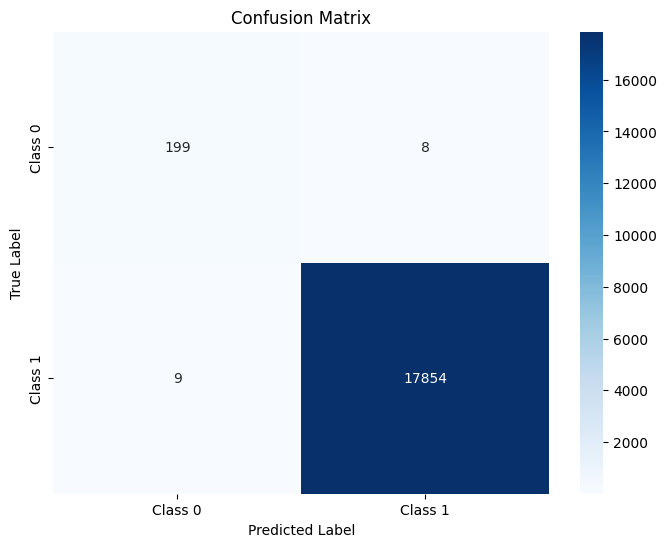

              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96       207
     Class 1       1.00      1.00      1.00     17863

    accuracy                           1.00     18070
   macro avg       0.98      0.98      0.98     18070
weighted avg       1.00      1.00      1.00     18070



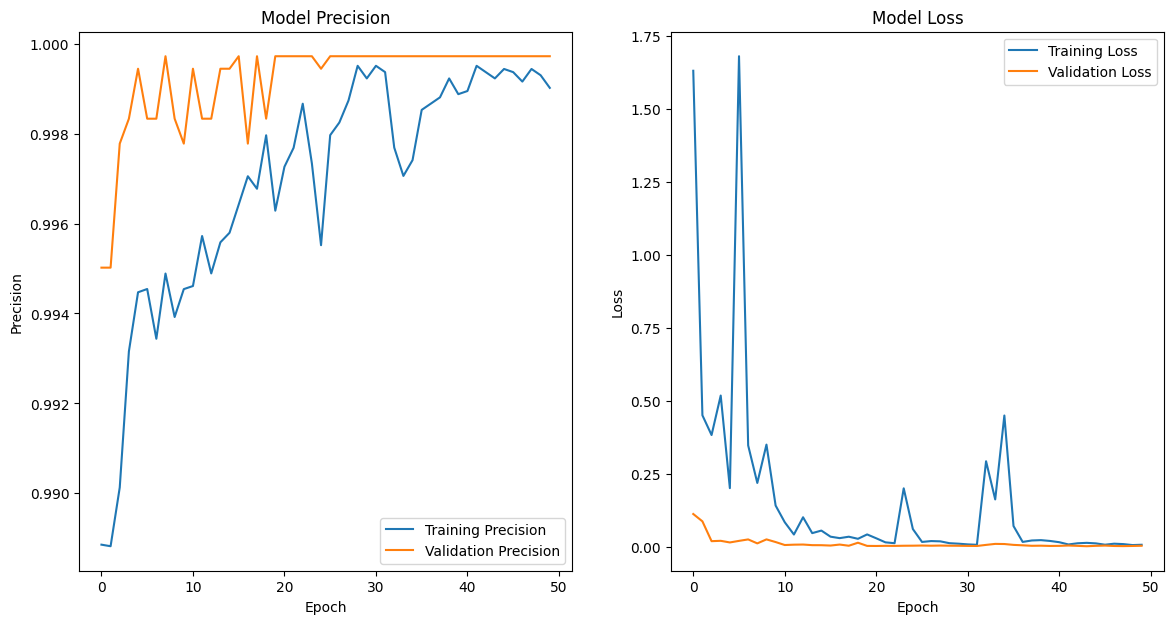

In [ ]:
# Confusion matrix
cm = confusion_matrix(data["Action"], y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(data["Action"], y_pred_class, target_names=['Class 0', 'Class 1']))

# Training history plots
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# pickle.dump(model, open('intrusion_detection_model.pkl', 'wb'))

In [ ]:
data.head()

In [ ]:
data.to_csv("finalDf.csv", index=False)

In [ ]:
data.drop("Action", axis=1).to_csv("testDAta.csv", index=False)

In [ ]:
input_data = {
        "Bytes Sent": 70,
        "Bytes Received": 0,
        "Elapsed Time (sec)": 0,
        "pkts_sent": 1,
        "pkts_received":0
    }

model.predict(pd.DataFrame(input_data, index=[0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.00096736]], dtype=float32)